# Berlin temperature variations

The turn of the year 2020-21 was one where Berlin was cold, wet and perenially overcast. I had gotten used to seeing the temperature hover around zero degrees Celsius for days at an end. After some time, I however got curious about how less the temperature was fluctuating even over the course of a single day. I downloaded the temperature data for the last two weeks from [Meteoblue](https://www.meteoblue.com/en/weather/archive/export/berlin_germany_2950159) (a longer data stretch would need to be paid for), and started playing around with it. The results were quite pleasant.


In [1]:
#       Copyright 2021
#       Abhirup Ghosh <abhirup.ghosh.184098@gmail.com>,
#
#       This program is free software; you can redistribute it and/or modify
#       it under the terms of the GNU General Public License as published by
#       the Free Software Foundation; either version 2 of the License, or
#       (at your option) any later version.
#
#       This program is distributed in the hope that it will be useful,
#       but WITHOUT ANY WARRANTY; without even the implied warranty of
#       MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#       GNU General Public License for more details.
#
#       You should have received a copy of the GNU General Public License
#       along with this program; if not, write to the Free Software
#       Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston,
#       MA 02110-1301, USA.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rc_params = {'backend': 'ps',
            'font.family': 'Times New Roman',
            'font.sans-serif': ['Bitstream Vera Sans'],
            'font.size':'20',
            'axes.unicode_minus':False,
            'text.usetex':True}

plt.rcParams.update(rc_params)

In [4]:
df = pd.read_csv('berlin_temp_dataexport_20210113T123203_reduced.csv')

In [5]:
# add column 'time' to pandas data frame
time_array = [int(float(string[-4:])) for string in df['timestamp']]
date_array = [string[:8] for string in df['timestamp']]
df['time'] = time_array
df['date'] = date_array

### Variation over a two-week period

In [6]:
mean_temp = np.mean(df['temperature'].values)
median_temp = np.median(df['temperature'].values)
std_temp = np.std(df['temperature'].values)

print(f'Mean Temp: {mean_temp:.2f} degrees Celsius')
print(f'Median Temp: {median_temp:.2f} degrees Celsius')
print(f'Standard Deviation: {std_temp:.3f} degrees Celsius')

Mean Temp: 1.10 degrees Celsius
Median Temp: 0.88 degrees Celsius
Standard Deviation: 1.272 degrees Celsius


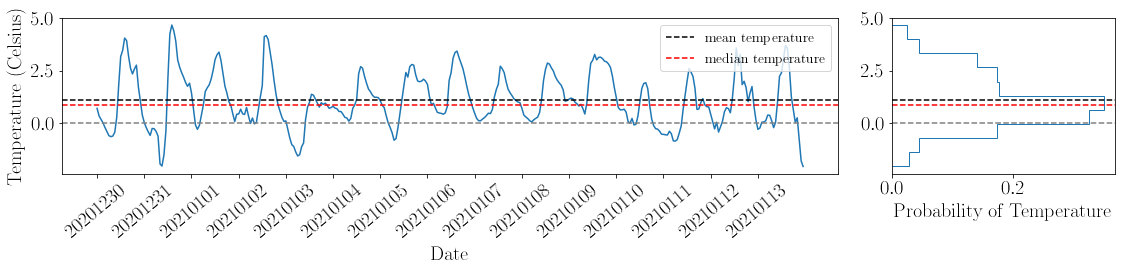

In [10]:
fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

ax1.plot(df['timestamp'].values, df['temperature'].values)
ax2.axhline(y=mean_temp, color='k', ls='dashed')
ax2.axhline(y=median_temp, color='r', ls='dashed')
ax1.axhline(y=0, color='grey', ls='dashed')
ax1.set_xticks(np.arange(len(df['timestamp'].values), step=24))
ax1.set_xticklabels(df['date'][0::24], rotation=40)
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Celsius)')

ax2.hist(df['temperature'].values, histtype='step', density=True, bins=10, orientation="horizontal")
ax1.axhline(y=mean_temp, color='k', ls='dashed', label='mean temperature')
ax1.axhline(y=median_temp, color='r', ls='dashed', label='median temperature')
ax2.axhline(y=0, color='grey', ls='dashed')
ax2.set_xlabel('Probability of Temperature')

plt.tight_layout()

### Diurnal variation of temperature over the two-week period

The maximum average temperture over the two-week period was at 14:00 hours: 3.01 degrees Celsius
The minimum average temperture over the two-week period was at 8:00 hours: -0.05 degrees Celsius


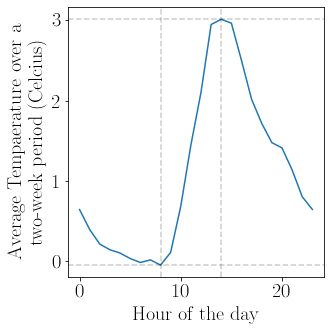

In [8]:
mean_hourly_temp = [df['temperature'].values[int(idx)::24].mean() for idx in range(24)]

print(f"The maximum average temperture over the two-week period was at {np.where(mean_hourly_temp == max(mean_hourly_temp))[0][0]}:00 hours: \
{max(mean_hourly_temp):.2f} degrees Celsius")
print(f"The minimum average temperture over the two-week period was at {np.where(mean_hourly_temp == min(mean_hourly_temp))[0][0]}:00 hours: \
{min(mean_hourly_temp):.2f} degrees Celsius")

plt.figure(figsize=(5,5))
plt.plot(np.arange(24), mean_hourly_temp)
plt.axhline(y=max(mean_hourly_temp), color='k', ls='dashed', alpha=0.2)
plt.axvline(x=np.where(mean_hourly_temp == max(mean_hourly_temp)), color='k', ls='dashed', alpha=0.2)
plt.axhline(y=min(mean_hourly_temp), color='k', ls='dashed', alpha=0.2)
plt.axvline(x=np.where(mean_hourly_temp == min(mean_hourly_temp)), color='k', ls='dashed', alpha=0.2)
plt.xlabel('Hour of the day')
plt.ylabel('Average Tempaerature over a\n two-week period (Celcius)')
plt.tight_layout()